In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os

In [2]:
def create_model(input_length):

    input_layer = tf.keras.layers.Input(shape=(input_length,))

    label_layer_1 = tf.keras.layers.Dense(128, activation='tanh')(input_layer)
    dropout_layer_2 = tf.keras.layers.Dropout(rate=0.5)(label_layer_1)
 
    label_layer_2 = tf.keras.layers.Dense(64, activation='tanh')(dropout_layer_2)
    dropout_layer_3 = tf.keras.layers.Dropout(rate=0.5)(label_layer_2)

    output_layer = tf.keras.layers.Dense(1, activation="linear")(dropout_layer_3)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

In [6]:
cleanedDataDirectory = '../Datasets/ESI_Clean.csv'
cleanedData = pd.read_csv(cleanedDataDirectory, header=1, nrows=None)
"""cleanedProductivityData = cleanedProductivityData.drop(['mean'], axis=1)
cleanedProductivityData = cleanedProductivityData.reset_index(drop=True)"""

cleanedData

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,EU.ESI,100.4,99.4,98.4,98.1,97.3,97.4,98.5,99.8,100.3,...,103.6,101.9,97.8,97.1,93.9,92.8,94.1,95.6,97.8,97.8
1,EA.ESI,100.1,98.9,97.9,97.8,96.7,96.9,98.2,99.2,99.9,...,104.2,103.0,98.6,97.8,94.4,93.8,95.1,97.1,99.8,99.7
2,BE.ESI,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,...,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4,88.9
3,BG.ESI,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,...,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6,102.1
4,CZ.ESI,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,...,97.0,95.0,89.5,87.7,89.5,83.9,82.2,83.3,88.5,92.0
5,DK.ESI,106.3,107.6,106.0,97.6,100.9,100.2,96.9,106.7,102.6,...,94.2,88.5,86.2,90.0,82.4,74.5,78.7,77.7,78.3,79.6
6,DE.ESI,94.1,92.9,90.7,91.4,92.1,91.4,92.8,94.2,95.3,...,106.6,104.6,99.4,97.0,92.7,91.6,92.9,95.3,97.8,97.9
7,EE.ESI,105.8,107.7,110.1,110.1,110.7,110.3,113.1,111.2,109.8,...,95.7,92.5,89.5,88.5,84.8,84.4,84.3,81.2,83.5,82.6
8,EL.ESI,103.7,103.2,102.2,102.4,101.9,100.4,100.2,101.5,102.4,...,107.4,104.2,100.5,100.7,105.7,99.0,101.6,103.7,105.9,107.5
9,ES.ESI,105.6,103.6,104.3,104.6,104.4,103.7,104.9,105.3,105.6,...,103.6,101.7,96.7,97.6,96.9,98.3,96.5,98.8,101.5,99.5


In [7]:
valAndTest_len = int(len(cleanedData)*0.15)

test = cleanedData.tail(valAndTest_len)
test.reset_index(drop=True, inplace=True)
cleanedData.drop(cleanedData.index[-valAndTest_len:], inplace=True)

val = cleanedData.tail(valAndTest_len)
val.reset_index(drop=True, inplace=True)
cleanedData.drop(cleanedData.index[-valAndTest_len:], inplace=True)

In [8]:
cleanedData

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,EU.ESI,100.4,99.4,98.4,98.1,97.3,97.4,98.5,99.8,100.3,...,103.6,101.9,97.8,97.1,93.9,92.8,94.1,95.6,97.8,97.8
1,EA.ESI,100.1,98.9,97.9,97.8,96.7,96.9,98.2,99.2,99.9,...,104.2,103.0,98.6,97.8,94.4,93.8,95.1,97.1,99.8,99.7
2,BE.ESI,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,...,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4,88.9
3,BG.ESI,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,...,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6,102.1
4,CZ.ESI,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,...,97.0,95.0,89.5,87.7,89.5,83.9,82.2,83.3,88.5,92.0
5,DK.ESI,106.3,107.6,106.0,97.6,100.9,100.2,96.9,106.7,102.6,...,94.2,88.5,86.2,90.0,82.4,74.5,78.7,77.7,78.3,79.6
6,DE.ESI,94.1,92.9,90.7,91.4,92.1,91.4,92.8,94.2,95.3,...,106.6,104.6,99.4,97.0,92.7,91.6,92.9,95.3,97.8,97.9
7,EE.ESI,105.8,107.7,110.1,110.1,110.7,110.3,113.1,111.2,109.8,...,95.7,92.5,89.5,88.5,84.8,84.4,84.3,81.2,83.5,82.6
8,EL.ESI,103.7,103.2,102.2,102.4,101.9,100.4,100.2,101.5,102.4,...,107.4,104.2,100.5,100.7,105.7,99.0,101.6,103.7,105.9,107.5
9,ES.ESI,105.6,103.6,104.3,104.6,104.4,103.7,104.9,105.3,105.6,...,103.6,101.7,96.7,97.6,96.9,98.3,96.5,98.8,101.5,99.5


In [9]:
trainTarget = cleanedData.loc[:,"Feb-23"]

trainInput = cleanedData.drop(['Feb-23', 'Month-Year'], axis=1)
trainInput = trainInput.reset_index(drop=True)

In [10]:
trainTarget

0      97.8
1      99.7
2      88.9
3     102.1
4      92.0
5      79.6
6      97.9
7      82.6
8     107.5
9      99.5
10     97.1
11    105.6
12     95.2
13     94.6
14     97.9
15     94.1
16    104.6
17     97.5
18     94.9
19     89.8
Name: Feb-23, dtype: float64

In [11]:
trainInput

,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23
0,100.4,99.4,98.4,98.1,97.3,97.4,98.5,99.8,100.3,102.0,...,103.9,103.6,101.9,97.8,97.1,93.9,92.8,94.1,95.6,97.8
1,100.1,98.9,97.9,97.8,96.7,96.9,98.2,99.2,99.9,101.9,...,104.3,104.2,103.0,98.6,97.8,94.4,93.8,95.1,97.1,99.8
2,105.3,104.4,102.6,98.1,94.6,97.0,94.8,96.9,99.9,104.2,...,101.3,97.8,97.7,98.0,92.9,86.0,83.4,82.4,88.0,87.4
3,112.4,106.2,106.3,108.1,108.7,112.4,109.9,101.7,107.3,103.4,...,95.7,95.0,98.7,100.0,99.4,99.4,100.1,103.4,103.5,101.6
4,108.9,108.6,105.4,105.2,108.0,105.9,110.2,106.9,109.1,110.0,...,93.3,97.0,95.0,89.5,87.7,89.5,83.9,82.2,83.3,88.5
5,106.3,107.6,106.0,97.6,100.9,100.2,96.9,106.7,102.6,107.2,...,98.4,94.2,88.5,86.2,90.0,82.4,74.5,78.7,77.7,78.3
6,94.1,92.9,90.7,91.4,92.1,91.4,92.8,94.2,95.3,96.6,...,106.3,106.6,104.6,99.4,97.0,92.7,91.6,92.9,95.3,97.8
7,105.8,107.7,110.1,110.1,110.7,110.3,113.1,111.2,109.8,114.1,...,99.0,95.7,92.5,89.5,88.5,84.8,84.4,84.3,81.2,83.5
8,103.7,103.2,102.2,102.4,101.9,100.4,100.2,101.5,102.4,102.0,...,103.9,107.4,104.2,100.5,100.7,105.7,99.0,101.6,103.7,105.9
9,105.6,103.6,104.3,104.6,104.4,103.7,104.9,105.3,105.6,106.3,...,100.1,103.6,101.7,96.7,97.6,96.9,98.3,96.5,98.8,101.5


In [14]:
maxTrainInput = np.max(trainInput.max())
print(maxTrainInput)

123.4


In [15]:
maxTrainTarget = np.max(trainTarget)
print(maxTrainTarget)

107.5


In [16]:
test

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,SK.ESI,109.0,111.6,107.3,110.1,106.4,108.5,104.1,103.3,103.9,...,99.2,93.6,92.2,88.0,87.9,86.7,84.1,85.3,88.1,84.8
1,FI.ESI,105.1,103.9,103.8,102.6,102.9,106.8,111.7,111.7,107.4,...,99.3,96.9,92.2,88.9,85.0,85.2,83.7,82.5,87.2,86.2
2,SE.ESI,103.6,101.9,100.3,98.1,97.9,100.1,99.3,102.0,102.0,...,107.3,102.6,98.6,96.1,89.6,83.9,86.1,84.0,83.1,84.9


In [17]:
testTarget = test.loc[:,"Feb-23"]

testInput = test.drop(['Feb-23', 'Month-Year'], axis=1)
testInput = testInput.reset_index(drop=True)

In [18]:
testTarget

0    84.8
1    86.2
2    84.9
Name: Feb-23, dtype: float64

In [19]:
testInput

,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23
0,109.0,111.6,107.3,110.1,106.4,108.5,104.1,103.3,103.9,104.4,...,91.9,99.2,93.6,92.2,88.0,87.9,86.7,84.1,85.3,88.1
1,105.1,103.9,103.8,102.6,102.9,106.8,111.7,111.7,107.4,109.4,...,101.0,99.3,96.9,92.2,88.9,85.0,85.2,83.7,82.5,87.2
2,103.6,101.9,100.3,98.1,97.9,100.1,99.3,102.0,102.0,103.2,...,108.2,107.3,102.6,98.6,96.1,89.6,83.9,86.1,84.0,83.1


In [20]:
val

,Month-Year,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,...,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23,Feb-23
0,PT.ESI,98.2,98.2,97.6,101.1,99.8,95.3,93.3,99.2,98.0,...,106.1,105.6,103.6,103.0,100.1,98.2,97.8,97.1,98.5,102.9
1,RO.ESI,114.4,104.2,107.3,100.0,108.5,99.8,107.1,105.7,102.5,...,101.9,101.8,101.9,100.6,101.9,102.4,104.7,102.1,100.7,101.7
2,SI.ESI,106.1,105.6,102.1,101.5,102.0,101.0,99.9,103.4,103.6,...,99.0,96.7,95.3,96.1,90.4,91.1,94.2,97.5,96.0,95.8


In [21]:
valTarget = val.loc[:,"Feb-23"]

valInput = val.drop(['Feb-23', 'Month-Year'], axis=1)
valInput = valInput.reset_index(drop=True)

In [22]:
valTarget

0    102.9
1    101.7
2     95.8
Name: Feb-23, dtype: float64

In [23]:
valInput

,Jan-05,Feb-05,Mar-05,Apr-05,May-05,Jun-05,Jul-05,Aug-05,Sep-05,Oct-05,...,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22,Jan-23
0,98.2,98.2,97.6,101.1,99.8,95.3,93.3,99.2,98.0,101.4,...,106.2,106.1,105.6,103.6,103.0,100.1,98.2,97.8,97.1,98.5
1,114.4,104.2,107.3,100.0,108.5,99.8,107.1,105.7,102.5,105.6,...,103.5,101.9,101.8,101.9,100.6,101.9,102.4,104.7,102.1,100.7
2,106.1,105.6,102.1,101.5,102.0,101.0,99.9,103.4,103.6,104.3,...,101.8,99.0,96.7,95.3,96.1,90.4,91.1,94.2,97.5,96.0


In [24]:
trainInput = trainInput/maxTrainInput
trainTarget = trainTarget/maxTrainTarget
valInput = valInput/maxTrainInput
valTarget = valTarget/maxTrainTarget
testInput = testInput/maxTrainInput
testTarget = testTarget/maxTrainTarget

In [57]:
model = create_model(217)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss="mse", metrics=["mse", "mae"]) 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=1e-6, patience=10, verbose=1, mode="min", restore_best_weights=True)

callbacks=[early_stopping]

model.summary()

training_history = model.fit(x = np.asarray(trainInput).astype('float32'), y = np.asarray(trainTarget).astype('float32'),                         
                                      #steps_per_epoch=steps_per_training_epoch,
                                      epochs = 1000,
                                      verbose = 1,
                                      callbacks=callbacks,
                                      validation_data = (valInput, valTarget),
                                      validation_freq=1,
                                      #validation_steps=self.__validation_steps
                                      )

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 217)]             0         
                                                                 
 dense_15 (Dense)            (None, 128)               27904     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 36,225
Trainable params: 36,225
Non-trainable

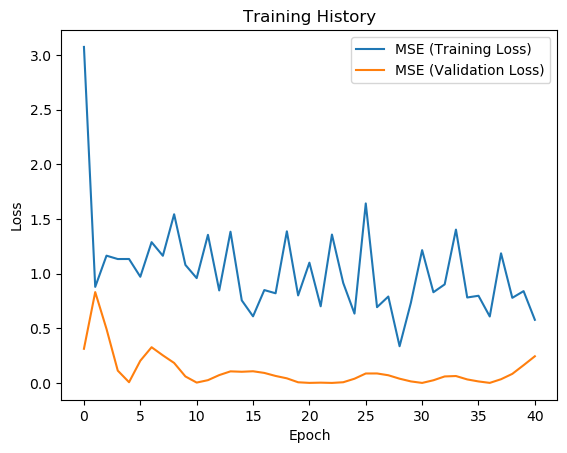

In [58]:
plt.plot(training_history.history["loss"], label="MSE (Training Loss)")
plt.plot(training_history.history["val_loss"], label="MSE (Validation Loss)")
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [59]:
start_time = time.time()
testing_history = model.predict(x=testInput, verbose=2)

end_time = time.time()
test_time = end_time - start_time

evaluation_metrics = model.evaluate(x=testInput, y=testTarget)

1/1 - 0s - 52ms/epoch - 52ms/step
1/1 [==============================] - 0s 23ms/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1395


In [60]:
print(evaluation_metrics)

[0.019520295783877373, 0.019520295783877373, 0.13948911428451538]


In [61]:
print(testing_history*maxTrainTarget)

[[100.67247]
 [100.03796]
 [100.17482]]


In [62]:
print(testTarget*maxTrainTarget)

0    84.8
1    86.2
2    84.9
Name: Feb-23, dtype: float64


In [63]:
def mae(prediction, true):
    MAE = 0
    for i in range(len(prediction)):
        MAE += abs(true[i] - prediction[i])
    MAE = MAE / len(prediction)
        
    return MAE

def rmse(prediction, true):
    RMSE = 0
    for i in range(len(prediction)):
        RMSE += (true[i] - prediction[i])**2
    RMSE = RMSE / len(prediction)
    RMSE = np.sqrt(RMSE)
        
    return RMSE

In [64]:
print("MAE: " + str(mae(testing_history*maxTrainTarget, testTarget*maxTrainTarget)))
print("RMSE: " + str(rmse(testing_history*maxTrainTarget, testTarget*maxTrainTarget)))

MAE: [14.995082]
RMSE: [15.01937]


In [65]:
model_path = "../models/" + "trainedANN_ESI.h5"

if not os.path.exists (model_path):
    open((model_path), 'a').close()

model.save(model_path)

In [ ]:
"""loadedModel = tf.keras.models.load_model(model_path)

startTime = time.time()
testingHistory = loadedModel.predict(x=testInput, verbose=2)

endTime = time.time()
testTime = endTime - startTime

evaluationMetrics = loadedModel.evaluate(x=testInput, y=testTarget)

print(evaluationMetrics)

print(testingHistory*maxTrainTarget)

print(testTarget*maxTrainTarget)"""